<a href="https://colab.research.google.com/github/MaureenGatu/Football-Match-Prediction/blob/main/Football_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Football Match Prediction**

## 1. Defining the Question

### a) Specifying the Question


> Mchezopesa Ltd has hired us as football analysts to forecast the outcome of a game between team 1 and team 2 based on who is at home and who is away, as well as whether or not the game is friendly.



### b) Defining the Metric for Success



> Perforn Exploratory analysis.
Predict the number of goals the home team and away team will score.
Determine if the game is a win, loss, or a tie from the standpoint of the home team (W, L, D)
In prodective modeling, get an RMSE of less than 10% of the desired mean and a high accuracy rating



### c) Understanding the context 



> Belgium presently leads the men's FIFA World Rating, which is a ranking system for men's national football teams. The teams of FIFA's men's member nations are ranked based on their game results, with the most successful teams rated first. In December 1992, the rankings were established.


> FIFA uses the rankings to rate the progress and existing capabilities of its member nations' national football teams, claiming that they provide "a valid metric for comparing national A-teams." They are used to seed tournaments as part of the calculation or as the complete grounds.





### d) Recording the Experimental Design



> Flow for the Research:

1. Data preparation

2. Eploratory analysis

3. Feature engineering 

4. Check of multicollinearity

5. Polynomial Regression

6. Cross-validate the model

7. Compute RMSE

8. Logistic Regression

9. Residual plots and  heteroscedasticity using Bartlett’s test

10. Challenge your solution 





#Importing Libraries

In [1]:
#Import libraries for loading and cleaning data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore') 

##  Reading the Data

In [2]:
# Loading the ranking Dataset
rank=pd.read_csv('/content/fifa_ranking.csv')

#Load the  results dataset
results=pd.read_csv('/content/results.csv')

## Checking the Data

In [3]:
# Previewing the top of the rabking  dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
# Previewing the bottom of the ranking dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
#Preview of the top os the results dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#preview the bottom of the results dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
#checking the sahpe of the two datasets

print(f'Size of results dataset : {results.shape}')
print(f'Size of rank dataset : {rank.shape}')

Size of results dataset : (40839, 9)
Size of rank dataset : (57793, 16)


In [8]:
# Checking the information on the ranking dataset and the column data types
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [9]:
# Checking the information on the results dataset and the column data types
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


#Data Preparation

##Data Cleaning

In [10]:
#change date  data types into date type format
results['date'] = pd.to_datetime(results['date'])
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

#confirming that the changes have been effected.
print(results.dtypes)
print(' ')
print(rank.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object
 
rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object


In [11]:
# #dropint the columns that shall not be used i the analysis.
rank.drop(['country_abrv','total_points','previous_points','cur_year_avg',
           'cur_year_avg_weighted', 'last_year_avg','last_year_avg_weighted','two_year_ago_avg',
           'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis = 1, inplace = True)

# let us confirm that we have dropped the unnecessary columns
rank.head()

,rank,country_full,rank_change,confederation,rank_date
0,1,Germany,0,UEFA,1993-08-08
1,2,Italy,0,UEFA,1993-08-08
2,3,Switzerland,9,UEFA,1993-08-08
3,4,Sweden,0,UEFA,1993-08-08
4,5,Argentina,5,CONMEBOL,1993-08-08


In [12]:
# Extrecting the year and the month form the date column onto new columns of month and year

#Ranking dataset
rank['year'] = rank['rank_date'].dt.year
rank['month'] = rank['rank_date'].dt.month
print(rank.head(2))
print(' ')
print('....'*30)
#results dataset
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month
print(results.head(2))

   rank country_full  rank_change confederation  rank_date  year  month
0     1      Germany            0          UEFA 1993-08-08  1993      8
1     2        Italy            0          UEFA 1993-08-08  1993      8
 
........................................................................................................................
        date home_team away_team  home_score  ...   country neutral  year month
0 1872-11-30  Scotland   England           0  ...  Scotland   False  1872    11
1 1873-03-08   England  Scotland           4  ...   England   False  1873     3

[2 rows x 11 columns]


In [13]:
# confirming if the two datasets are from the same timeframes

#ranking dataset years
print(rank.year.unique())
print(' ')
print('Total number of years in the ranking dateset ' ,rank.year.nunique())
print(' ')
print('...'*20)
print(' ')

#results dataset years
print(results.year.unique())
print(' ')
print('Total number of years in the results dateset ' ,results.year.nunique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
 
Total number of years in the ranking dateset  26
 
............................................................
 
[1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]

In [14]:
#we are going to drop the years that are not in both datesets.
# We are also goint to drop all the data before 1999 as the fifa ranking formular was changed in 1998.
#this will be done by filtering the data to keep only the required timeframe.

results = results[results['year'] > 1998]
results = results[results['year'] < 2019]
rank = rank[rank['year'] > 1998]

In [15]:
# confirming if the two datasets are from the same timeframes

#ranking dataset years
print(rank.year.unique())
print(' ')
print('Total number of years in the ranking dateset ' ,rank.year.nunique())
print(' ')

#check the new size of the data 
print(f'New size of rank dataset : {rank.shape}')
print('...'*20)
print(' ')
#results dataset years
print(results.year.unique())
print(' ')
print('Total number of years in the results dateset ' ,results.year.nunique())
print(' ')

#check the new size of the data 
print(f'New size of results dataset : {results.shape}')

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]
 
Total number of years in the ranking dateset  20
 
New size of rank dataset : (47735, 7)
............................................................
 
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]
 
Total number of years in the results dateset  20
 
New size of results dataset : (18657, 11)


##Merging the datasets

This will be done in three steps.

Since our datasets do not a a key column that can be used in merging, we will create a unique key identifier by combining 3 diffrent columns.

The combination of these three variables will  uniquely identify each row. The columns to be combined are:

      Ranking Dataset:
            country_full
            year
            month
 
    Results dataset
          home_team
          away-team
          year
          month.

###Step one

Here we will combine the 3 columns from the rank data with the year, month and home_team from results column. This will create a dataframe where the rank country_full column represent the games played in the home county.

In [16]:
# Create a dataset df1 that contains the home games played
df1 = pd.merge(results, rank, how='inner', left_on=['home_team','year','month'], right_on=['country_full','year','month'])
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,rank_change,confederation,rank_date
0,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,Ouagadougou,Burkina Faso,False,1999,1,84,Burkina Faso,-9,CAF,1999-01-27
1,1999-01-10,Burkina Faso,Mali,1,0,Friendly,Ouagadougou,Burkina Faso,False,1999,1,84,Burkina Faso,-9,CAF,1999-01-27
2,1999-01-15,Burkina Faso,Mali,4,1,Friendly,Ouagadougou,Burkina Faso,False,1999,1,84,Burkina Faso,-9,CAF,1999-01-27
3,1999-01-10,Senegal,Guinea,1,0,Friendly,Dakar,Senegal,False,1999,1,88,Senegal,7,CAF,1999-01-27
4,1999-01-13,Senegal,Guinea,1,0,Friendly,Dakar,Senegal,False,1999,1,88,Senegal,7,CAF,1999-01-27


In [17]:
# let us get the shape of our merged dataframe
df1.shape

(15796, 16)

###Step two

Here we will combine the 3 columns from the rank data with the year, month and away_team from results column. This will create a dataframe where the rank country_full column represent the games played in the away from the home county.

In [18]:
# # Create a dataset df2 that contains the away games played
df2 = pd.merge(results, rank, how='inner', left_on=['away_team','year','month'], right_on=['country_full','year','month'])
df2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,rank_change,confederation,rank_date
0,1999-01-03,Ivory Coast,Togo,3,1,Friendly,Abidjan,Ivory Coast,False,1999,1,72,Togo,-4,CAF,1999-01-27
1,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,Ouagadougou,Burkina Faso,False,1999,1,83,Gabon,-1,CAF,1999-01-27


In [19]:
# let us get the shape of our merged dataframe
df2.shape

(15735, 16)

###Step Three

Here we will merge the two datasets to have one data that represents the game that were played both away and in the home county for ach team.

In [20]:
#Merge the two new datasets we created above
df = pd.merge(df1, df2, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])


#preview of the dataset
df.head(3)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,rank_x,country_full_x,rank_change_x,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,rank_y,country_full_y,rank_change_y,confederation_y,rank_date_y
0,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,Ouagadougou,Burkina Faso,False,1999,1,84,Burkina Faso,-9,CAF,1999-01-27,1999-01-04,Burkina Faso,2,1,Friendly,Ouagadougou,Burkina Faso,False,83,Gabon,-1,CAF,1999-01-27
1,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,Ouagadougou,Burkina Faso,False,1999,1,84,Burkina Faso,-9,CAF,1999-01-27,1999-01-24,Angola,3,1,African Cup of Nations qualification,Luanda,Angola,False,83,Gabon,-1,CAF,1999-01-27
2,1999-01-24,Angola,Gabon,3,1,African Cup of Nations qualification,Luanda,Angola,False,1999,1,59,Angola,-9,CAF,1999-01-27,1999-01-04,Burkina Faso,2,1,Friendly,Ouagadougou,Burkina Faso,False,83,Gabon,-1,CAF,1999-01-27


In [21]:
#shape of the dataset
print(f'Size of new dataset : {df.shape}')
print(' ')
#basic info of the dataset
df.info()

Size of new dataset : (23974, 29)
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23974 entries, 0 to 23973
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_x           23974 non-null  datetime64[ns]
 1   home_team_x      23974 non-null  object        
 2   away_team        23974 non-null  object        
 3   home_score_x     23974 non-null  int64         
 4   away_score_x     23974 non-null  int64         
 5   tournament_x     23974 non-null  object        
 6   city_x           23974 non-null  object        
 7   country_x        23974 non-null  object        
 8   neutral_x        23974 non-null  bool          
 9   year             23974 non-null  int64         
 10  month            23974 non-null  int64         
 11  rank_x           23974 non-null  int64         
 12  country_full_x   23974 non-null  object        
 13  rank_change_x    23974 non-null  int64         
 14  co

## Cleaning the new dataset 

In [22]:
# let us drop columns that have been repeated and are not needed
df.drop(columns= ['country_x','rank_change_y','confederation_y','rank_date_y', 
'date_y','home_team_y','home_score_y','away_score_y','tournament_y','country_y',
'neutral_y', 'rank_date_x','country_full_x','city_x','city_y'], inplace=True)

# let us rename our columns to reflect home and away information
df.rename(columns={'home_team_x':'home_team','rank_x' : 'home_rank','rank_y' : 'away_rank', 'rank_change_x':'rank_change',
                   'country_full_y':'away_team','confederation_x':'confederation','home_score_x':'home_score',
                   'away_score_x':'away_score','tournament_x':'tournament','neutral_x':'neutral','date_x':'date',},inplace=True)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,rank_change,confederation,away_rank,away_team
0,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,False,1999,1,84,-9,CAF,83,Gabon
1,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,False,1999,1,84,-9,CAF,83,Gabon
2,1999-01-24,Angola,Gabon,3,1,African Cup of Nations qualification,False,1999,1,59,-9,CAF,83,Gabon
3,1999-01-24,Angola,Gabon,3,1,African Cup of Nations qualification,False,1999,1,59,-9,CAF,83,Gabon
4,1999-01-10,Burkina Faso,Mali,1,0,Friendly,False,1999,1,84,-9,CAF,79,Mali


In [23]:
#check for null values
df.isnull().sum()

#there are no null values

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
neutral          0
year             0
month            0
home_rank        0
rank_change      0
confederation    0
away_rank        0
away_team        0
dtype: int64

In [24]:
#check the shape
df.shape

(23974, 14)

In [25]:
#check for duplicates
df.duplicated().sum()

9597

In [26]:
#droping the duplicates
df.drop_duplicates(inplace=True)

#check to see if the duplicates have been droped
df.duplicated().sum()

0

NameError: ignored

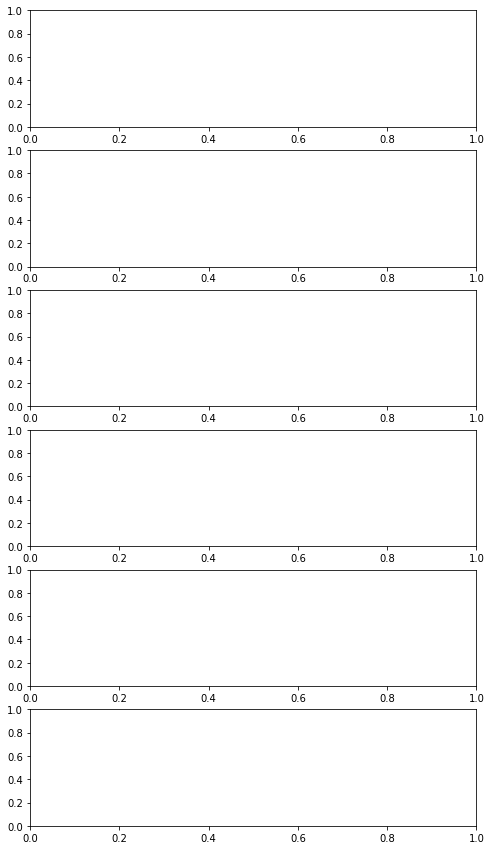

In [27]:
# import seaborn as sns
# Checking for outliers in the columns with numerical data

col_names = ['home_score', 'away_score', 'year', 'month', 'home_rank','away_rank']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

There are a number of outliers in the home and away scores columns.

In [ ]:
#detecting and removing outliers

#defining numerical variables
cols = ['year', 'month', 'home_rank','away_rank']

#detecting outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#remove outliers
df[cols] = df[cols][~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

#size of dataset after removing the outliers
print(f'Size of the cleaned dataset : {df.shape}')

#preview of the dateset
df.head()

# Feature Engineering 

In [ ]:
# To create two columns that shows whehter the home team won, lost or if it was a draw.
#the second column will show the margin of win or loss
df['outcome'] = df.home_score - df.away_score
df['margin'] = df.home_score - df.away_score

#We will use a function to set the column for the win, lose or draw
margin = df.home_score - df.away_score

def match_result(margin):
  if margin > 0:
    return 'WIN'
  elif margin < 0:
    return 'LOSS'
  else:
    return 'DRAW'

#We'll then apply this function to the entire dateset
df['outcome']= df.outcome.apply(lambda margin: match_result(margin))

#Preview th data to comfirm that the columns have been updated
df.head()

In [ ]:
#check the different types of turnaments. The research was to analysis based on whehter the tournament was world cup, friendly or others
df.tournament.unique()

In [ ]:
# #we're going to change the tournament types to be either World cup, Friendly or other

def tnmt(i):
  if i == 'FIFA World Cup':
    return 'World Cup'
  elif i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

df['tournament'] = df.tournament.apply(lambda x: tnmt(x))

#check if the changes have been updated
df.tournament.unique()

In [ ]:
#preview the dataset
df.head()

# Save the cleaned data to  a *csv* file

In [ ]:
#saving the data to a csv file
df.to_csv('Fifa Dataset.csv', index = False)

In [ ]:
#loading the cleaned dataset to be used in the analysis
df = pd.read_csv('/content/Fifa Dataset.csv')

In [ ]:
#preview the datset
df.head()

In [ ]:
#shape of the data
df.shape

# Exploratory Analysis

## **Univarient Analysis**

###Measures of Dispersion

In [ ]:
#Dscriptive statistics
df.describe()

In [ ]:
#Frequency dustribution
column = ['home_rank','home_score', 'away_score','away_rank', 'rank_change','margin']
for i in column:
  print(f'Frequency: {i}')
  print(df[i].value_counts().sort_values(ascending=False))
  print(' ')
  print('....'*20)

In [ ]:
# skewness and kurtosis of the data
for i in column:
  print(i)
  print(f'skewness:  {df[i].skew()}')
  print(f'Kurtosis:  {df[i].kurt()}')
  print(' ')
  s= abs(df[i].skew())
  if s > 1:
    print('highly skewed distribution')
  else:
    print('')
  k = df[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
  print(' ')
  print('....'*20)

###Univariete Visualizations

In [ ]:
#histogram plots
for i in column:
  df.hist(i)

In [ ]:
#Visual of the matches played on neutral ground
import seaborn as sns
sns.countplot(x='neutral', data=df)
plt.title('Matches Played on Neutral Ground')

Only a few matches were played in a neutral location(About 3000,compared to the others that were hosted by a team which were more than 10,000)

In [ ]:
#Visual of the matches played on neutral ground
sns.countplot(x='outcome', data=df)
plt.title('Outcome of Matches Played')

Most of the matches were won (by the host team). The Losses were slightly higher than the draws.

In [ ]:
#Visual of the matches played on neutral ground
sns.countplot(x='tournament', data=df)
plt.title('Types of Tournament')

Most of the maches played were others follwed by friendly. The least types of tournaments played were world cup matches.

In [ ]:
# Bar graph showing Matches across the years.

df.year.value_counts().sort_values().head(10).plot.barh(color = 'lightgreen')
plt.title('year')
degrees = 60
plt.xticks(rotation=degrees)


Most of the matches played were in the year 2003 while the year with the least number of matches was 2018.

In [ ]:
# Bar graph showing Distribution of matches across the months of the year

df.month.value_counts().sort_values().head(10).plot.barh(color = 'lightgreen')
plt.title('months')



Most matches were played in the months of september, March and November while the very fer matches were played in December and April.

In [ ]:
# Bar graph showing confederations

df.confederation.value_counts().head(10).plot.bar(color = 'lightgreen')
plt.title('Confederations')
degrees = 10
plt.xticks(rotation=degrees)


UEFA Confederations are the highest occuring in our dataframe

###Time series Graph

In [ ]:
#make a copy of our data to use in time series analysis
ts = df.copy()

# set date as index
ts = ts.set_index('date')

#plot of Matches over the years.
%matplotlib inline
d = ts.groupby('year').count()
d1 = d['home_score']
d1.plot()


### Bivariate Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

In [ ]:
# Calculating the pearson coefficient correlation
a = df.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()

There is a high positve correlation between home score and the win/lose margin and a negative correlation between the away score and win/lose margin.

# Predictive Analysis

###Preparing the data for predictive analysis

In [ ]:
# creating a copy so that we can preserve the original data when we encode the data

df_copy = df.copy()

In [ ]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df_copy['neutral'] = labelencoder.fit_transform(df_copy['neutral'])
df_copy['tournament'] = labelencoder.fit_transform(df_copy['tournament'])
df_copy['outcome'] = labelencoder.fit_transform(df_copy['outcome'])
df_copy.head(2)


### Polynomial Regression

In [ ]:
#checking the corrrelation between the variables to be used in the predictive model
x = ['away_rank', 'home_rank','tournament','home_score','away_score']

sns.pairplot(df_copy[x])
plt.show()



> The scatter plots above show that there is linear relationship between our variables of interest hence we will use the polynomial regression.



#### Predicting Home Team Score

#####Checking for Multicollinearity

In [ ]:
#Declaring our Independent and Deendent variables 
X = df_copy[['home_rank', 'away_rank','tournament']]
y = df_copy['home_score']


In [ ]:
# We will first chech the correlation between out independent variables that shall be used in the analysis
X.corr()

The correlation between the independent variables is very low.

In [ ]:
# Checking for Multicollinearity
# VIF dataframe 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif



> The variance inflation factors among our variables are less than 5. This means that than the correlations are low enough for us to proceed with the regression model.



In [ ]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

In [ ]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred

In [ ]:
pd.DataFrame(pol_reg.coef_.flatten())

In [ ]:
# evaluating our model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('The Rmse of the model is : ' ,rmse)
print('The mean of y is         : ', y.mean())
print('The R2 value is          : ', r2)



> The Rmsea is almost equal to the mean we are trying to predict. We need to re assess our model and our X variables to come up with a better model.



#####Cross validation

Use K-Fold cross validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = df_copy[['away_rank', 'home_rank','tournament']].values
y = df_copy['home_score'].values

folds = LeaveOneOut()


print('we are using ' +str(folds.get_n_splits(X)) + ' folds')


RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
print(f'Mean RMSE : {np.mean(RMSES)}')

#### Predicting Away score

In [ ]:
#Declaring our Independent and Dependent variables 
X = df_copy[['away_rank', 'home_rank','tournament']]
y = df_copy['away_score']
X.corr()



> The correlation between the independent variables is very low.



In [ ]:
# Checking for Multicollinearity
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                         for i in range(len(X.columns))] 
  
print(vif_data)



> The variance inflation factors among our variables are less than 5. This means that than the correlations are low enough for us to proceed with the regression model.



In [ ]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

In [ ]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred

In [ ]:
# evaluating our model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('The Rmse of the model is : ' ,rmse)
print('The mean of y is         : ', y.mean())
print('The R2 value is          : ', r2)

#####Cross validation

Use K-Fold cross validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = df_copy[['away_rank', 'home_rank','tournament']].values
y = df_copy['away_score'].values

folds = LeaveOneOut()


print('we are using ' +str(folds.get_n_splits(X)) + ' folds')


RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
print(f'Mean RMSE : {np.mean(RMSES)}')



> The Rmsea is almost equal to the mean we are trying to predict. We need to re assess our model and our X variables to come up with a better model.



### Logistic Regression



> Logistic regression is used since were are trying to predict win, lose or draw, which are a classification kind of prediction.



In [ ]:
# Checking our target variable
import seaborn as sns
sns.countplot(x='outcome',data=df_copy, palette='hls')

In [ ]:
# Checking for independence between features¶
# 
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(), annot=True)  

In [ ]:
# Splitting our dataset
# We will drop all non-numerical data and data we have not encoded in our dataframe
X = df_copy.drop(["outcome",'date', 'home_team', 'away_team','away_team.1','year','month','margin', 'confederation', 'tournament'],axis=1)
y = df_copy["outcome"]

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Measuring the accuracy of the model
#
from sklearn.metrics import accuracy_score
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

The correctness of the model shown above is 100%.
We must reconsider our model because it is definitely overfitting on the training data.

In [ ]:
# Checking for Residuals in our predicted values

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

# There are no residuals

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
  print('The errors seem to follow a certain pattern')
else:
  print('the variances are homogeneous!')
  print('There is no pattern to the errors.')


### Hyperparameter Tuning

**Random Search**



> We will use Random search becauseit  works best for lower dimensional data,it takes less time and has fewer iterations to find the right set. When there are fewer dimensions, random search is the best parameter search technique.



In [ ]:
#Defining our X and Y
X = df2.drop(['outcome','date', 'home_team','away_team.1', 'away_team','year','month','margin', 'confederation', 'tournament'],axis=1)
y = df2['outcome']

# Performing Data Preprocessing
# ---
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X,y)

search.best_params_

In [ ]:
#Random Search

from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

# Calling the fit method

random_sr.fit(X_train, y_train)

#Checking the parameters that return the highest accuracy

best_parameters = random_sr.best_params_
print(best_parameters)

# Finding the obtained accuracy
best_result = random_sr.best_score_
print(best_result)

# using the parameters generated below would yield an accuracy of 99.97% for our model.



> In this case, we can see that the best configuration achieved a fairly high accuracy of around 99.9 percent, and the specific values for the  penalty(11), and C hyperparameters (2.195254015709299) used to achieve that score.



# Challenge Your Solution



> Because the RMSE produced by our Polynomial Regression prediction models was not ideal,it was almost equal to the predicted mean, the models were quite ineffective. As a result, we may need to use other prediction models to accurately predict our home and away scores or used of other variables to achieve better results.



**Did we have the right data?**



>  Yes we did because it has the information we need to do our predictons. 
 The data did generate problems in trying to merge the different dataset. In future better/ more relatable dataset should be prodided for better analysis and prediction.



